# Inspecting Timing Data

In [4]:
import sys
sys.path.insert(0, '../..')
from modelling_utilities.constants import *
from modelling_utilities import data_processing

import pandas as pd
import matplotlib.pyplot as plt
from typing import List
import os


## Loda Data

In [14]:
timing_data_folder_path = RAW_DATA_FOLDER + "Timing_Data/"
timing_data_folder_names = os.listdir(timing_data_folder)


In [25]:
# Goal: DF with columns [trace] and [timestamps] and [video id]
# 1. Read in one dataframe and convert it into a 1list dataframe as above
# 2. Read in all dataframes of a class with the video id
# 3. Concatinate all dataframes above into one
# 4. Read in every single file from all video ids

video_dfs = []

for video_dfs_folder_name in timing_data_folder_names:
    video_dfs_folder_path = timing_data_folder_path + video_dfs_folder_name +"/"
    video_df_filenames = os.listdir(video_dfs_folder_path)

    for video_df_filename in video_df_filenames:
        video_df_file_path = video_dfs_folder_path + video_df_filename
        video_df = pd.read_pickle(video_df_file_path)
        video_dfs.append(video_df)
timing_data_df = pd.concat(video_dfs)
timing_data_df.reset_index(inplace=True,drop=True)
timing_data_df

,timestamps,rtts,video_id
0,"[1689258581.4567401, 1689258581.739079, 168925...","[0.07507109642028809, 0.0029058456420898438, 0...",KUXS5fJPFSA
1,"[1689258386.5279849, 1689258386.737561, 168925...","[0.007814884185791016, 0.0019237995147705078, ...",KUXS5fJPFSA
2,"[1689258776.5243, 1689258776.732432, 168925877...","[0.004431962966918945, 0.031130075454711914, 0...",KUXS5fJPFSA
3,"[1689262914.3894742, 1689262914.5969222, 16892...","[0.002106189727783203, 0.014531850814819336, 0...",aQDXXSh1psg
4,"[1689262719.233469, 1689262719.4395971, 168926...","[0.003158092498779297, 0.0064160823822021484, ...",aQDXXSh1psg
...,...,...,...
122,"[1689272535.7921312, 1689272536.002332, 168927...","[0.0054972171783447266, 0.007135868072509766, ...",c5gRjiHdnLk
123,"[1689272927.254278, 1689272927.464572, 1689272...","[0.00467991828918457, 0.008926868438720703, 0....",c5gRjiHdnLk
124,"[1689261924.449503, 1689261924.65889, 16892619...","[0.008162975311279297, 0.002209186553955078, 0...",WAfJpyBgcgA
125,"[1689262124.5909429, 1689262124.7940018, 16892...","[0.0026807785034179688, 0.0014181137084960938,...",WAfJpyBgcgA


In [34]:
# There are 7 Videos missing --> keep track of the videos for which the analysis is peformed
expect = len(timing_data_folder_names)*3
print("Number of traces I am expecting with given number of foldes", expect)
# One too many, what is going on?
display(timing_data_df["video_id"].value_counts())
# "UJl911UBoxg" only has one trace, JZ1ZoR0Y4SU has 6 --> remove both for uniformity of results 
timing_data_df = timing_data_df[timing_data_df["video_id"] != "UJl911UBoxg"]
timing_data_df = timing_data_df[timing_data_df["video_id"] != "JZ1ZoR0Y4SU"]
print("Number of videos is equal to expectation: ", expect == len(timing_data_df))
analysis_video_ids = list(timing_data_df["video_id"].unique())
print("Number of videos used in analisis",len(analysis_video_ids))

Number of traces I am expecting with given number of foldes 126


video_id
KUXS5fJPFSA    3
aQDXXSh1psg    3
ZI9Fjo8k618    3
sFEYQMrWNHU    3
XMEg6mfTfF4    3
Y2pVetbsK8g    3
agTMr9qITlI    3
WwAkT9Wk9Gk    3
buVYv-3f2Kc    3
beHTyPTJzlQ    3
XX5M6AvInLc    3
xF_lJGizHOY    3
EMm_34CoDRo    3
0mm05SkR_Ys    3
bhpTZOqXRN0    3
3IosA_ir06Y    3
q_8_KvcVTFA    3
b7v5XDJrH5g    3
c5gRjiHdnLk    3
tmlMwjkShLE    3
ECnC3Meyff4    3
2IFYt20QON8    3
sIGVmChnbI8    3
wqGLislwe2M    3
xLKoTS90pvQ    3
sQn_tYguBIY    3
ABBHqDKHqoY    3
fATegRW2EE4    3
xYcHxF_cO8o    3
RvrSoAzXVsE    3
yxAm9uRuItI    3
hDYFBB68NSk    3
3rzyq9SH3Qw    3
9A_YXyZb9VE    3
BuwLLUzp7DI    3
i8UNGbSHv6U    3
7GGzc3x9WJU    3
cicNiSBsDGI    3
k1Do5KcJLYQ    3
WAfJpyBgcgA    3
Name: count, dtype: int64

Number of videos is equal to expectation:  False
Number of videos used in analisis 40


In [ ]:
"""
Plan of action

1 Define a sequence to compare to:
- Try cross correlation 1 high var measure
(- Try highest 3 var average + cross correlation)
(- Try cross correlation 3 high measures )

2 Load bpi trace for 1 video (highest var) aggregated (1 sec) for now
    (- with the remaining fingerprints)

Breadcrumbs: Figure out a good measure of inspecting the correlation between timing data and the  BPTS
Get one timing trace and find a useful transformation. Try:
    3 Use a threshold to indicate there is nothing major transmitted here and cut out those measures
    4 Aggregate per interval (start with second)
        - (square values (reward measures that are there are large)) - similar to 3, do not think this is very useful
        - sum
        - mean
        - rms
        - check the length of the current rtt, if is longer than the given interval, perform a "carry over"
    (5 Divide by the number of measures in the measure - dont think this is needed, this is only useful for filtering out times where there is nothing. If we cut them out everything else indecates there is something transmitted there )
        - Punish if there are many measures in the interval (Its best if there are few measures)
    6 Sum of round trip times in a interval vs average number of round trip times in the interval --> Similar to the BBP approach of these authors
        - If a measure goes over several seconds that  must be reflected in the interval

7 Calculate Cross Correlation between the two traces

8 Calculate Cross Correlation between the query and 3 traces from class

9 Calculate Cross Correlation between the query and 3 traces from 3 other classes

10 Perform Kurkusal Wallis test to analyse group coherence


TODO: Tell Darragh to stop data collection. I am finishing this weekend. Apologize for wasting his time on data collection. I did not know that that was actually already enough.
TODO: check if there is a better bin than seconds
"""

## Find useful transformation for correlation 

In [2]:
df = pd.read_pickle(timing_data_folder+"newTEST.pd")
print("Measure, count", len(df))
df = {col: [df[col].tolist()] for col in df.columns}
df = pd.DataFrame(df)
df["video_id"] = pd.Series([v_id])
df

Measure, count 1630


,timestamps,rtts,video_id
0,"[1689093979.958637, 1689093979.983246, 1689093...","[0.021870136260986328, 0.005639791488647461, 0...",JZ1ZoR0Y4SU


<AxesSubplot:xlabel='timestamps'>

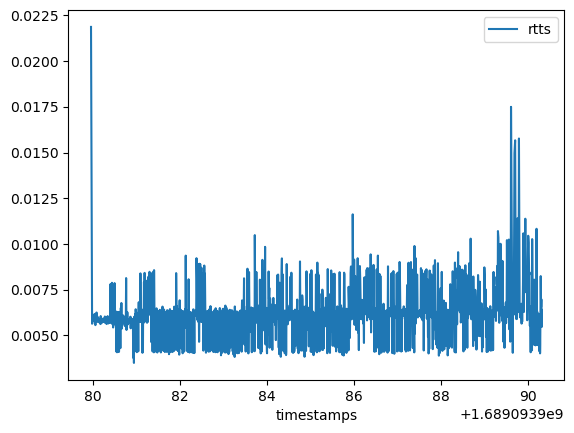

In [3]:
data = pd.read_pickle("newTEST.pd")
data.plot(x = "timestamps", y = "rtts")

In [4]:
interval = timedelta(milliseconds=790)
df["timestamps"] = df["timestamps"].apply(lambda timestamps: [datetime.fromtimestamp(ts) for ts in timestamps])
df["aggregated_rtts"] = df.apply(lambda row: aggregate_to_interval(timestamps=row["timestamps"], bpts=row["rtts"], bin_size =interval), axis=1)

In [5]:
test_data = list(df["aggregated_rtts"])[0]

(0.7, 0.8)

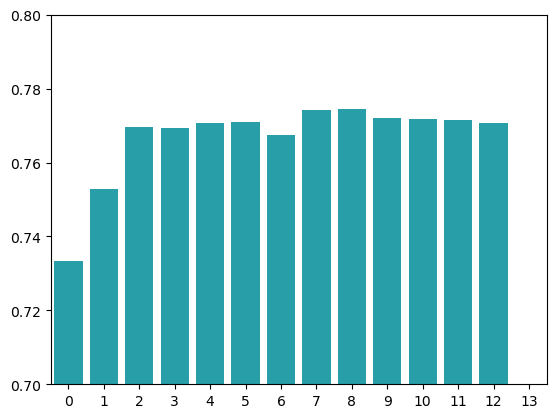

In [6]:
ax = sns.barplot(x=list(range(len(test_data))), y=test_data, color=ACCENT_COLOR)
ax.set_ylim([0.7, 0.8])

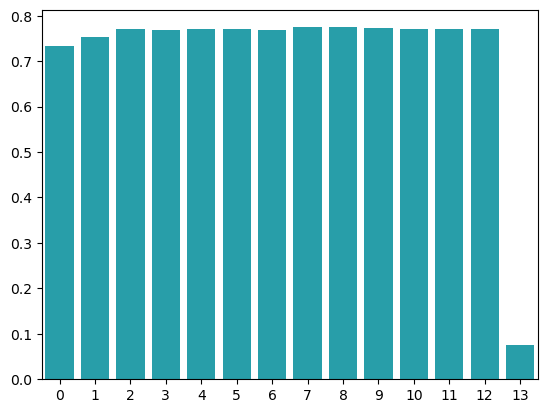

In [7]:
ax = sns.barplot(x=list(range(len(test_data))), y=test_data, color=ACCENT_COLOR)


In [20]:
def aggregate_to_interval_rtt(timestamps: List[datetime], bpts: List[int], bin_size: timedelta) -> List[int]:
    """
    TODO: Needs to be adjusted to be reflectig 1 actual second or interval --> len=len of the data = interval*
    Aggregate a BPTS (bit per time stamp) series into BPP (bits per period). 
    @param timestamps: List with the timestamps at which each value was collected
    @param bpts: List  with the number of bits collected at the specific timestamp (bit per time stamp)
    @param bin_size: Defines the length of the period for one bin
    @return: A list of BPP measures where 
    """
    # Create dictionary that maps all timestamps to their bit sizes
    bpts_dict = defaultdict(int)
    for timestamp, bit_count in zip(timestamps, bpts):
        bpts_dict[timestamp] += bit_count
    
    # Sort timestamps and bpts by timestamp
    timestamps = sorted(list(bpts_dict.keys()))
    bpts = [bpts_dict[timestamps[i]] for i in range(len(timestamps))]

    # Aggregate 
    bin_start_idx = 0
    bits_per_interval = []
    while bin_start_idx < len(timestamps): 
        bin_start = timestamps[bin_start_idx]
        bin_end = bin_start + bin_size

        bin_end_idx = get_bin_end_idx(timestamps[bin_start_idx:], bin_end)
        bin_end_idx+=bin_start_idx

        bin_values =  bpts[bin_start_idx:bin_end_idx]            
        bits_per_interval.append((np.sqrt(sum(bin_values))/len(bin_values)))
        bin_start_idx = bin_end_idx
    return bits_per_interval


In [21]:
df["aggregated_rtts"] = df.apply(lambda row: aggregate_to_interval_rtt(timestamps=row["timestamps"], bpts=row["rtts"], bin_size =interval), axis=1)

NameError: name 'interval' is not defined

In [66]:
test_data = list(df["aggregated_rtts"])[0][:-2]


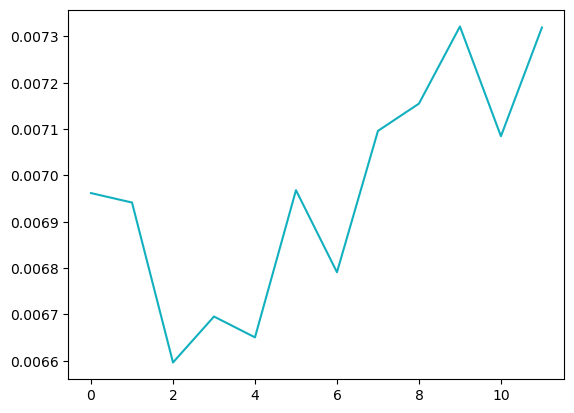

In [67]:
ax = sns.lineplot(x=list(range(len(test_data))), y=test_data, color=ACCENT_COLOR)

DBA (vectorized version of Petitjean's EM)


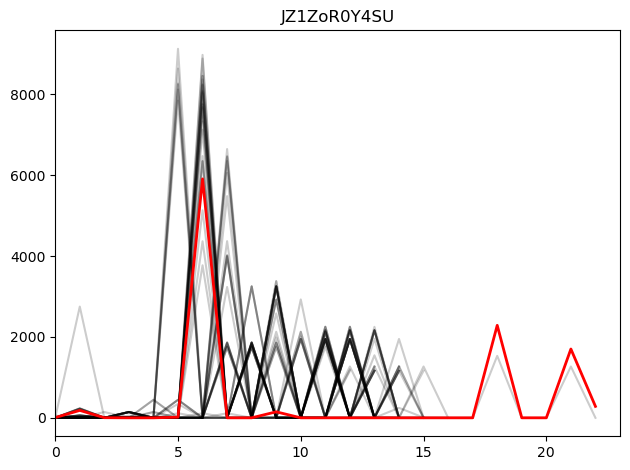

In [68]:
data_fn = "../../../../MCM1_Practicum_Data/Pre-Processed_Data/data-ms-aggregates/data-0790-ms-aggregate.parquet"
parquet_table = pq.read_table(data_fn)
data = parquet_table.to_pandas()
compare = list(data[data["video_id"]==v_id]["DF"].to_list())
plot_barycenters([compare], [v_id])

In [69]:
test_data

[0.00696196732187257,
 0.006941608483970164,
 0.00659634352216279,
 0.0066955323490606915,
 0.006650555568956324,
 0.00696822827386124,
 0.006791164745695449,
 0.007096226830502917,
 0.007155109174104382,
 0.007321609597473238,
 0.00708473378542014,
 0.007319370501838649]

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

compare_avg_scaled = list(average_sequences(compare))
compare_avg_scaled = [list(x ) for x in compare_avg_scaled]
compare_avg_scaled = scaler.fit_transform(compare_avg_scaled)
compare_avg_scaled = [x[0] for x in compare_avg_scaled]

test_data_scaled = [[x] for x in test_data]
test_data_scaled = scaler.fit_transform(test_data_scaled)
test_data_scaled = [x[0] for x in test_data_scaled]

test_data_scaled

[0.5041236756500371,
 0.4760528219379143,
 0.0,
 0.13676198332514744,
 0.07474780448034757,
 0.5127563033184295,
 0.2686203452288414,
 0.689241266560213,
 0.7704284964692629,
 1.0,
 0.673394606315064,
 0.9969127252593051]

0.07068148849974225


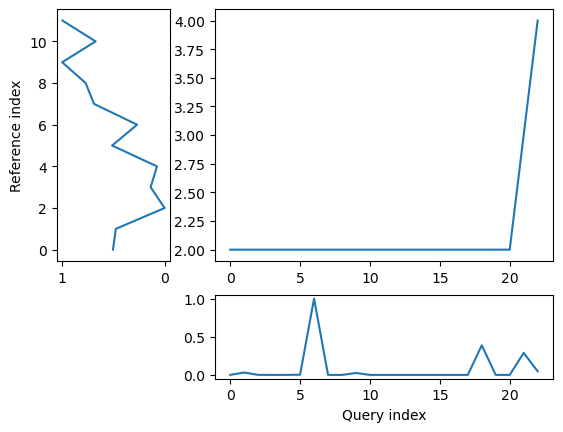

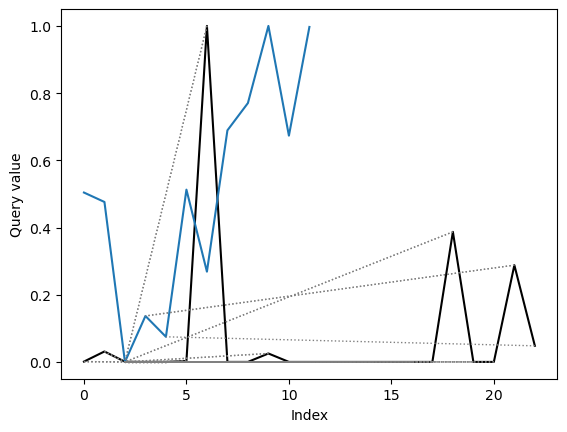

In [72]:
alignment = dtw(
            compare_avg_scaled, 
            test_data_scaled,
            keep_internals=True,
            step_pattern="asymmetric",
            open_end=True,
            open_begin=True)
alignment.plot(type="threeway")
alignment.plot(type="twoway")
print(alignment.normalizedDistance)


In [34]:
len(compare)

50

## Inspecting second timing data sample


In [27]:
test_files_path = timing_data_folder+v_id+"/"
test_files = os.listdir(test_files_path)
ts_data = []

def get_time_range(timestamp_list: List[datetime]) -> timedelta:
    low = min(timestamp_list)
    high = max(timestamp_list)
    return (high-low).seconds

def to_timestamp_list(raw_timestamps_list: List[int]) -> datetime: 
    return [datetime.fromtimestamp(x) for x in raw_timestamps_list]

for fn in test_files:
    fp = test_files_path+fn
    df = pd.read_pickle(fp)
    cols = df.columns
    df["timestamps"] = df["timestamps"].apply(to_timestamp_list)
    df["time_diff_sec"] = df["timestamps"].apply(get_time_range)
    df["ts_len"] = df.timestamps.apply(len)
    df["rtts_len"] = df.rtts.apply(len)
    ts_data.append(df[cols])
    display(df)

ts_data = pd.concat(ts_data)
display(ts_data)

,timestamps,rtts,video_id,time_diff_sec,ts_len,rtts_len
0,"[2023-07-13 00:10:30.755358, 2023-07-13 00:10:...","[0.13889002799987793, 0.11859679222106934, 0.0...",JZ1ZoR0Y4SU,117,561,561


,timestamps,rtts,video_id,time_diff_sec,ts_len,rtts_len
0,"[2023-07-13 00:07:14.842995, 2023-07-13 00:07:...","[0.017401695251464844, 0.009299039840698242, 0...",JZ1ZoR0Y4SU,117,561,561


,timestamps,rtts,video_id,time_diff_sec,ts_len,rtts_len
0,"[2023-07-13 00:03:57.714692, 2023-07-13 00:03:...","[0.07143616676330566, 0.025249004364013672, 0....",JZ1ZoR0Y4SU,126,562,562


,timestamps,rtts,video_id
0,"[2023-07-13 00:10:30.755358, 2023-07-13 00:10:...","[0.13889002799987793, 0.11859679222106934, 0.0...",JZ1ZoR0Y4SU
0,"[2023-07-13 00:07:14.842995, 2023-07-13 00:07:...","[0.017401695251464844, 0.009299039840698242, 0...",JZ1ZoR0Y4SU
0,"[2023-07-13 00:03:57.714692, 2023-07-13 00:03:...","[0.07143616676330566, 0.025249004364013672, 0....",JZ1ZoR0Y4SU


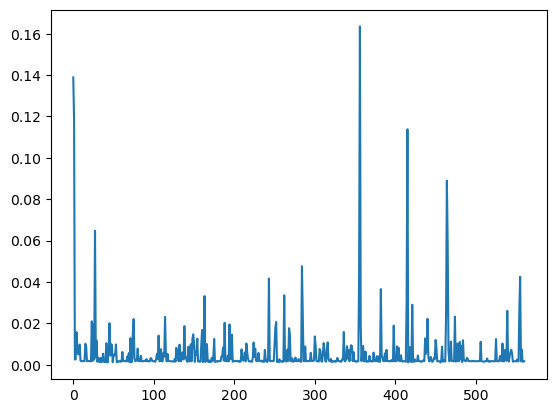

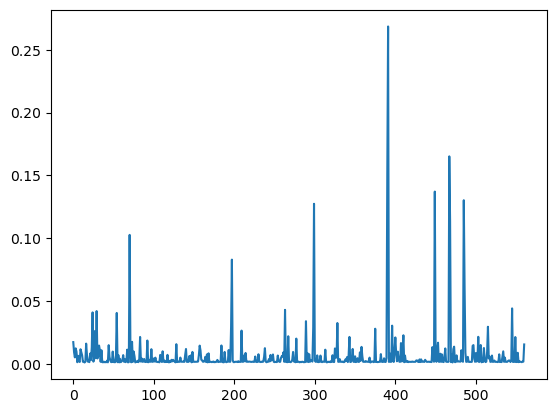

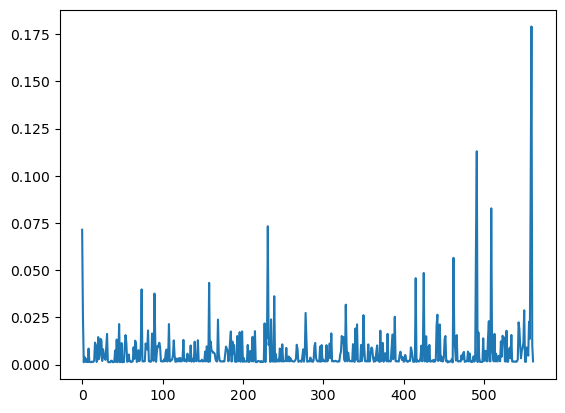

In [28]:
for t in ts_data.rtts: 
    pd.Series(t).plot()
    plt.show()

DBA (vectorized version of Petitjean's EM)


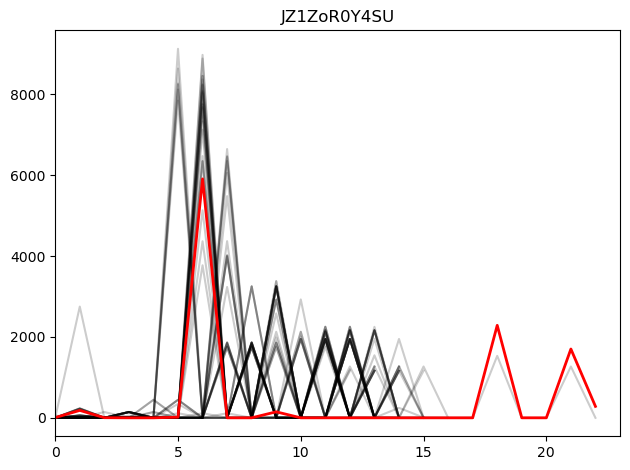

In [29]:
data_fn = "../../../../MCM1_Practicum_Data/Pre-Processed_Data/data-ms-aggregates/data-0790-ms-aggregate.parquet"
parquet_table = pq.read_table(data_fn)
data = parquet_table.to_pandas()
compare = list(data[data["video_id"]==v_id]["DF"].to_list())
plot_barycenters([compare], [v_id])

In [52]:
data

,video_id,ts,bpts,bpi,SF,DF,NDF,AF
0,3IosA_ir06Y,"[2023-06-22T11:47:43.490000, 2023-06-22T11:47:...","[5861.0, 5861.0, 5890.0, 72784.0, 11322.0, 254...","[17612.0, 84106.0, 1802646.0, 116790.0, 20191....","[66494.0, 1718540.0, -1685856.0, -96599.0, 277...","[3.7754939813763344, 20.43302499227166, -0.935...","[0.6537092746613186, 0.9108457285324197, -0.87...","[66494.0, 1718540.0, 1685856.0, 96599.0, 27767..."
1,3IosA_ir06Y,"[2023-06-22T10:59:57.390000, 2023-06-22T10:59:...","[5861.0, 5861.0, 5932.0, 72784.0, 25446.0, 567...","[11722.0, 104162.0, 1812793.0, 107716.0, 27899...","[92440.0, 1708631.0, -1705077.0, 2682196.0, -2...","[7.886026275379628, 16.403592480943146, -0.940...","[0.7976942459701081, 0.8913255658061874, -0.88...","[92440.0, 1708631.0, 1705077.0, 2682196.0, 232..."
2,3IosA_ir06Y,"[2023-06-22T11:42:25.130000, 2023-06-22T11:42:...","[5861.0, 5664.0, 5861.0, 72784.0, 11322.0, 254...","[101492.0, 52273.0, 1887504.0, 2797031.0, 2557...","[-49219.0, 1835231.0, 909527.0, -239924.0, -25...","[-0.48495447917077206, 35.10858378130201, 0.48...","[-0.3200923487139466, 0.9461041140296024, 0.19...","[49219.0, 1835231.0, 909527.0, 239924.0, 25555..."
3,3IosA_ir06Y,"[2023-06-22T12:14:12.380000, 2023-06-22T12:14:...","[5861.0, 5861.0, 72784.0, 6067.0, 25446.0, 474...","[11722.0, 78851.0, 25446.0, 1895547.0, 20189.0...","[67129.0, -53405.0, 1870101.0, -1875358.0, 277...","[5.726753113803105, -0.677290078756135, 73.492...","[0.7411590650635399, -0.5120473263852268, 0.97...","[67129.0, 53405.0, 1870101.0, 1875358.0, 27759..."
4,3IosA_ir06Y,"[2023-06-22T12:03:38.540000, 2023-06-22T12:03:...","[5861.0, 5861.0, 7479.0, 7392.0, 26827.0, 5786...","[26593.0, 58059.0, 1873710.0, 86811.0, 2796821...","[31466.0, 1815651.0, -1786899.0, 2710010.0, -2...","[1.1832437107509495, 31.272515889009455, -0.95...","[0.3717100600103955, 0.9398903285020104, -0.91...","[31466.0, 1815651.0, 1786899.0, 2710010.0, 239..."
...,...,...,...,...,...,...,...,...
2495,RvxefSebjYE,"[2023-06-22T07:27:08.360000, 2023-06-22T07:27:...","[5861.0, 5861.0, 72757.0, 5931.0, 17722.0, 690...","[90410.0, 17722.0, 138986.0, 20086.0, 2800754....","[-72688.0, 121264.0, -118900.0, 2780668.0, -81...","[-0.803981860413671, 6.842568558853403, -0.855...","[-0.6722154403876743, 0.7738213747862266, -0.7...","[72688.0, 121264.0, 118900.0, 2780668.0, 81818..."
2496,RvxefSebjYE,"[2023-06-22T07:43:04.900000, 2023-06-22T07:43:...","[5861.0, 5861.0, 5891.0, 72757.0, 17722.0, 518...","[90370.0, 17722.0, 158925.0, 2799974.0, 10630....","[-72648.0, 141203.0, 2641049.0, -2789344.0, 44...","[-0.8038950979307292, 7.9676673061731185, 16.6...","[-0.672094142027162, 0.7993512485352143, 0.892...","[72648.0, 141203.0, 2641049.0, 2789344.0, 4417..."
2497,RvxefSebjYE,"[2023-06-22T06:42:08.660000, 2023-06-22T06:42:...","[5861.0, 5924.0, 72757.0, 885.0, 17722.0, 2978...","[11785.0, 73642.0, 20700.0, 134028.0, 20086.0,...","[61857.0, -52942.0, 113328.0, -113942.0, 47352...","[5.248790835808231, -0.7189104043887998, 5.474...","[0.7240919147342175, -0.561171058489326, 0.732...","[61857.0, 52942.0, 113328.0, 113942.0, 4735211..."
2498,RvxefSebjYE,"[2023-06-22T08:06:55.740000, 2023-06-22T08:06:...","[5861.0, 5861.0, 72757.0, 5939.0, 17724.0, 268...","[84479.0, 23663.0, 107771.0, 57685.0, 2765930....","[-60816.0, 84108.0, -50086.0, 2708245.0, -7833...","[-0.7198948851193788, 3.554409838143938, -0.46...","[-0.5623716964731557, 0.6399257421976049, -0.3...","[60816.0, 84108.0, 50086.0, 2708245.0, 783358...."


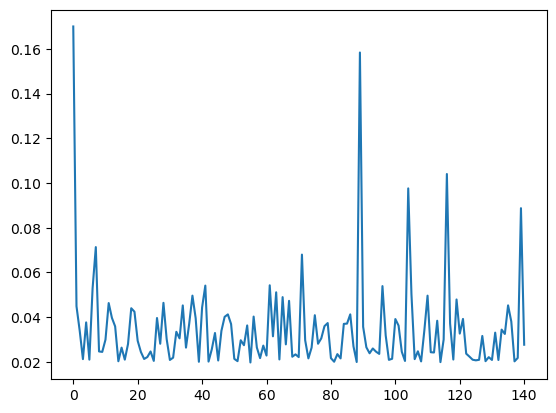

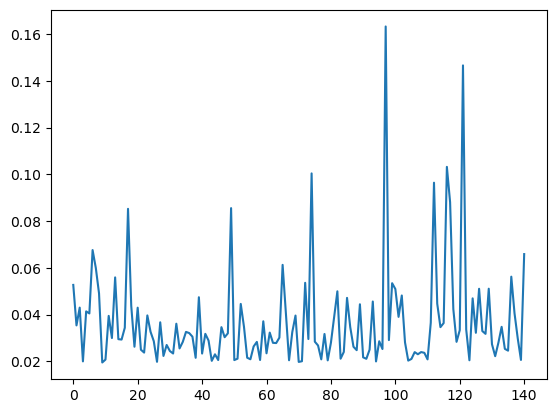

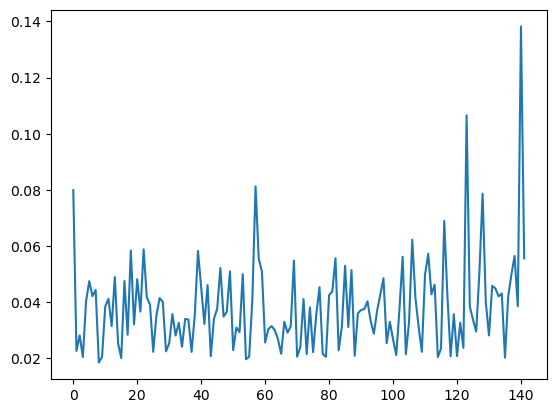

In [47]:
# aggregaate
interval = timedelta(milliseconds=790)
ts_data["aggregated_rtts"] = ts_data.apply(lambda row: aggregate_to_interval_rtt(timestamps=row["timestamps"], bpts=row["rtts"], bin_size =interval), axis=1)

for t in ts_data.aggregated_rtts: 
    pd.Series(t).plot()
    plt.show()

In [37]:
np.log(0.1)

-2.3025850929940455

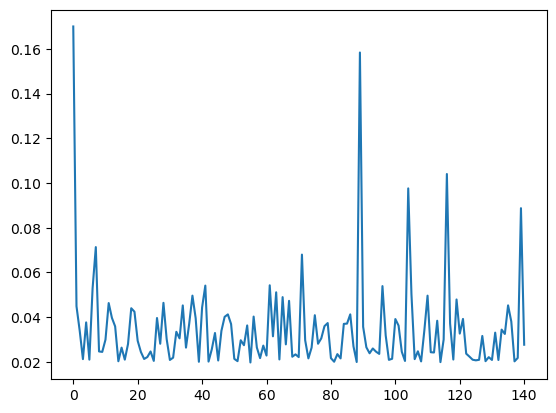

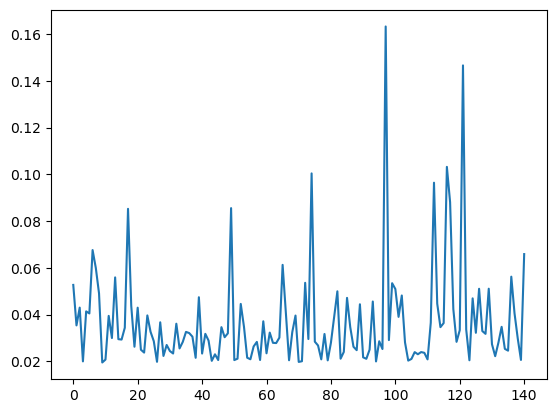

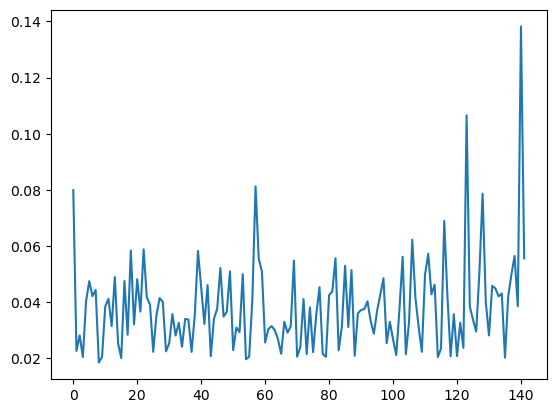

In [51]:
interval = timedelta(milliseconds=790)
ts_data["aggregated_rtts_scaled"] = ts_data["rtts"].apply(lambda rtts: np.array(rtts)-0.008) 
ts_data["aggregated_rtts_scaled"] = ts_data["rtts"].apply(lambda rtts: [np.log(rtt**2) for rtt in rtts]) 

ts_data["aggregated_rtts_scaled"] = ts_data.apply(lambda row: aggregate_to_interval(timestamps=row["timestamps"], bpts=row["aggregated_rtts_scaled"], bin_size =interval), axis=1)
for t in ts_data.aggregated_rtts: 
    pd.Series(t).plot()
    plt.show()